# Clustering

Clustering is an unsupervised machine learning technique used to group similar data points together. The goal is to create clusters where the data points within a single cluster are very similar, and points in different clusters are very dissimilar.

## Agglomerative Hierarchical Clustering
This is a "bottom-up" clustering method. It works by following these steps:
- Start: Initially, every single data point is considered its own cluster.
- Merge: Find the two closest clusters and merge them into a single new cluster.
- Repeat: Keep repeating the merge step until only one large cluster remains, containing all the data points.
  
The key to this process is how we define the "closeness" between two clusters. This is determined by the linkage criterion. There are three common types of linkages:

1) Single Linkage: The distance between two clusters is the minimum distance between any two points in the two clusters. This method is sensitive to outliers and can result in long, thin clusters, a phenomenon known as "chaining."
  
2) Complete Linkage: The distance is the maximum distance between any two points in the two clusters. This method tends to produce more compact, spherical clusters.
  
3) Average Linkage: The distance is the average distance between every pair of points across the two clusters. It's often a good middle ground between the single and complete linkage methods.



## Evaluation with the Silhouette Score
The Silhouette Score is a metric used to evaluate the quality of your clusters. It measures how well-separated the clusters are. For each data point, it calculates:

- How similar it is to points in its own cluster (cohesion).

- How dissimilar it is to points in other clusters (separation).
  
The score ranges from -1 to +1:
- +1: Indicates that the clusters are dense and well-separated. This is the best score.
- 0: Indicates overlapping clusters.
- -1: Indicates that data points may have been assigned to the wrong cluster.

## Calculating the Score for a Single Data Point
For any single data point, let's call it i, the calculation involves three steps:

### Step 1: Calculate a(i) - The Mean Intra-Cluster Distance
This is the average distance from point i to all other points within the same cluster. It measures the cohesion of the point within its cluster. A small a(i) value means the point is well-matched with its cluster.
  
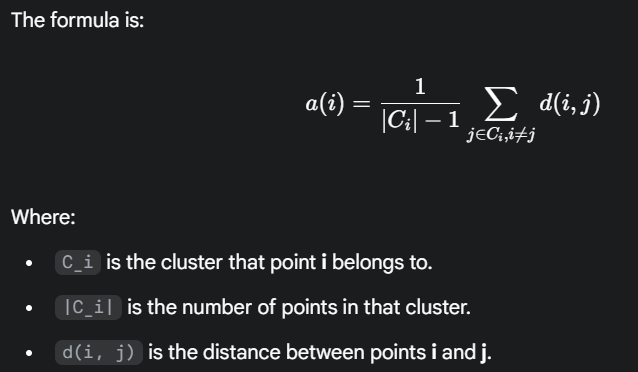

### Step 2: Calculate b(i) - The Mean Nearest-Cluster Distance
This is the average distance from point i to all the points in the single nearest neighboring cluster.
  
To find it, you first calculate the average distance from i to all points in every other cluster. Then, you choose the smallest of these average distances. b(i) measures the separation of the point from other clusters. A large b(i) value is desirable.



### Step 3: Calculate the Silhouette Score s(i)
Combine a(i) and b(i) to get the final score for point i.
  
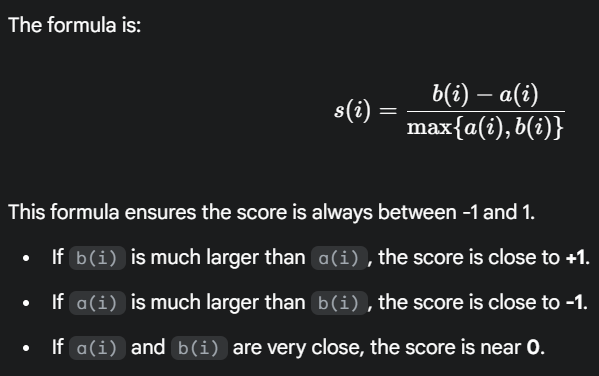

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
# --- 1. Load and Prepare the Dataset using Seaborn ---
# Load the Iris dataset as a pandas DataFrame
iris_df = sns.load_dataset('iris')

# Use only two features for 2D plotting (sepal_length and sepal_width)
# .values converts the DataFrame columns to a NumPy array for scikit-learn
X = iris_df[['sepal_length', 'sepal_width']].values

In [ ]:
# --- 2. Standardize Features ---
# Scale the features to have mean=0 and std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# --- 3. Run Clustering and Plotting ---
# Define the linkage methods to be tested
linkage_methods = ['single', 'complete', 'average']
# Set the target number of clusters
k = 3

Linkage: single, Silhouette Score: 0.2262
Linkage: complete, Silhouette Score: 0.3813
Linkage: average, Silhouette Score: 0.4213


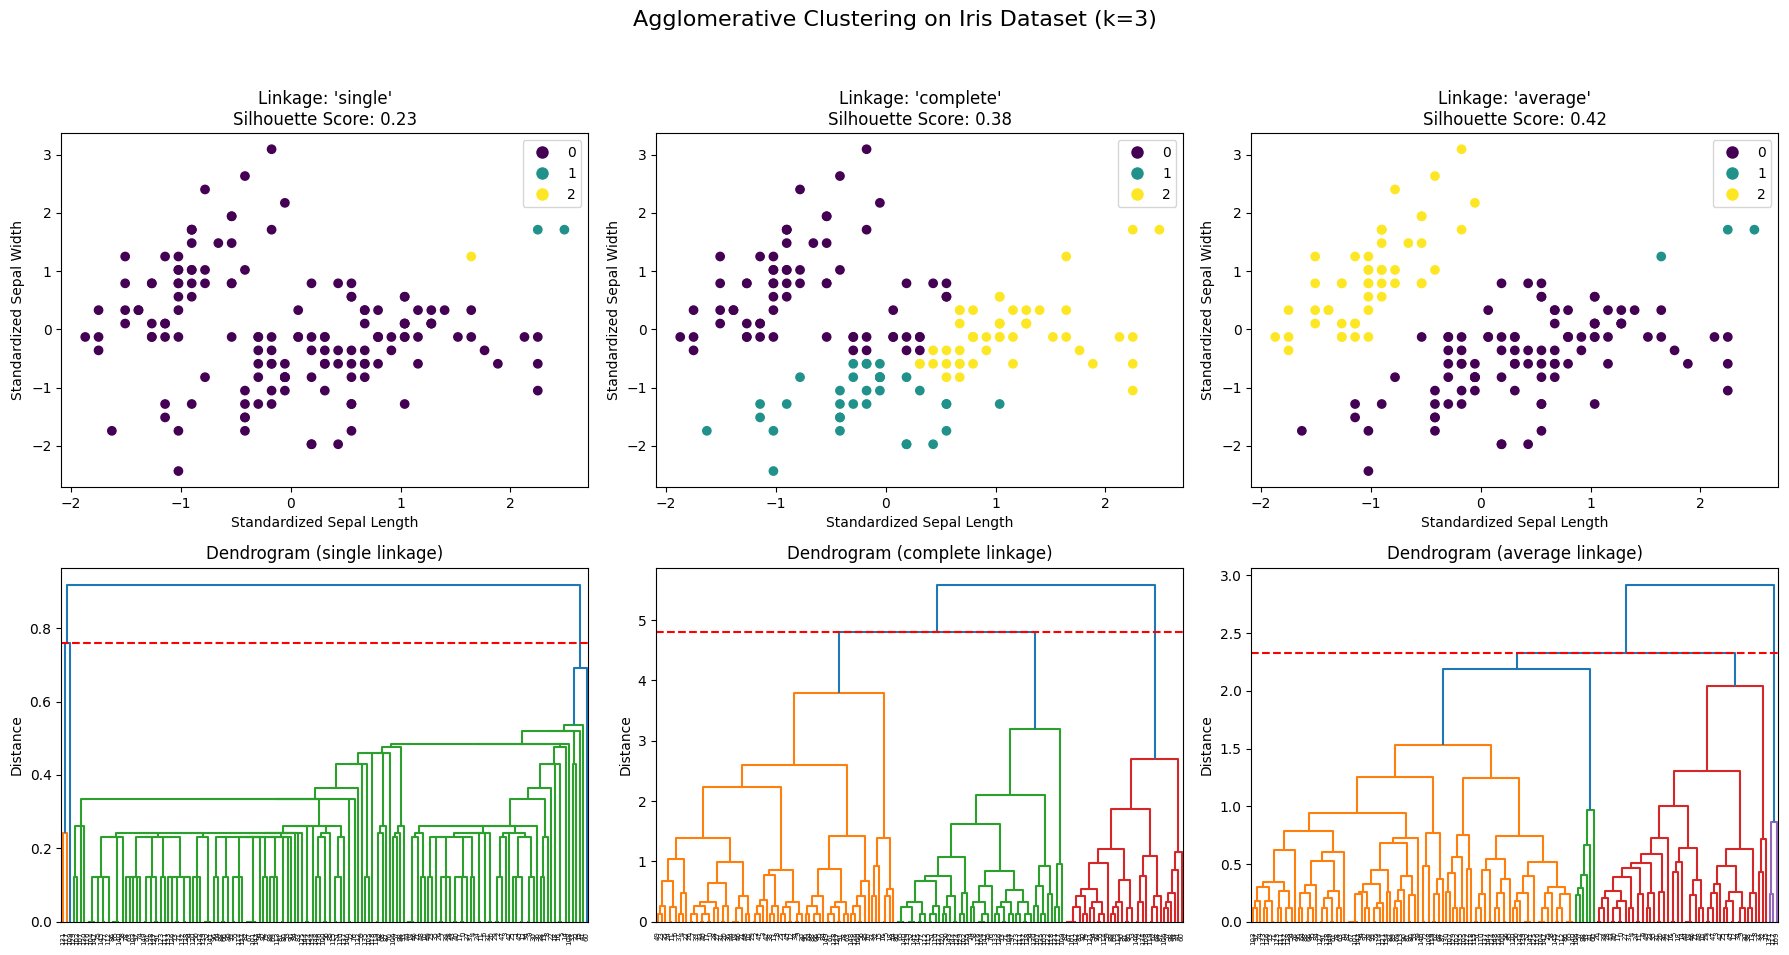

In [ ]:
# Create subplots for scatter plots and dendrograms
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'Agglomerative Clustering on Iris Dataset (k={k})', fontsize=16)

for i, method in enumerate(linkage_methods):
    # --- Run Agglomerative Clustering ---
    model = AgglomerativeClustering(n_clusters=k, linkage=method)
    labels_pred = model.fit_predict(X_scaled)

    # --- Compare Results: Silhouette Score ---
    score = silhouette_score(X_scaled, labels_pred)
    print(f"Linkage: {method}, Silhouette Score: {score:.4f}")

    # --- Plot 1: 2D Scatter Plot ---
    scatter = axes[0, i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_pred, cmap='viridis')
    axes[0, i].set_title(f"Linkage: '{method}'\nSilhouette Score: {score:.2f}")
    axes[0, i].set_xlabel("Standardized Sepal Length")
    axes[0, i].set_ylabel("Standardized Sepal Width")
    
    # Create a legend for the clusters
    # Get unique labels
    unique_labels = sorted(list(set(labels_pred)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=scatter.get_cmap()(scatter.norm(label)), 
                          markersize=10) for label in unique_labels]
    axes[0, i].legend(handles, unique_labels)


    # --- Plot 2: Dendrogram ---
    # Create linkage matrix for dendrogram
    linked = linkage(X_scaled, method=method)
    
    # Plot the dendrogram
    dendrogram(
        linked,
        ax=axes[1, i],
        orientation='top',
        distance_sort='descending',
        show_leaf_counts=True
    )
    axes[1, i].set_title(f"Dendrogram ({method} linkage)")
    axes[1, i].set_ylabel("Distance")
    # Mark the cut for k clusters by drawing a horizontal line
    axes[1, i].axhline(y=linked[-(k-1), 2], color='r', linestyle='--')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()